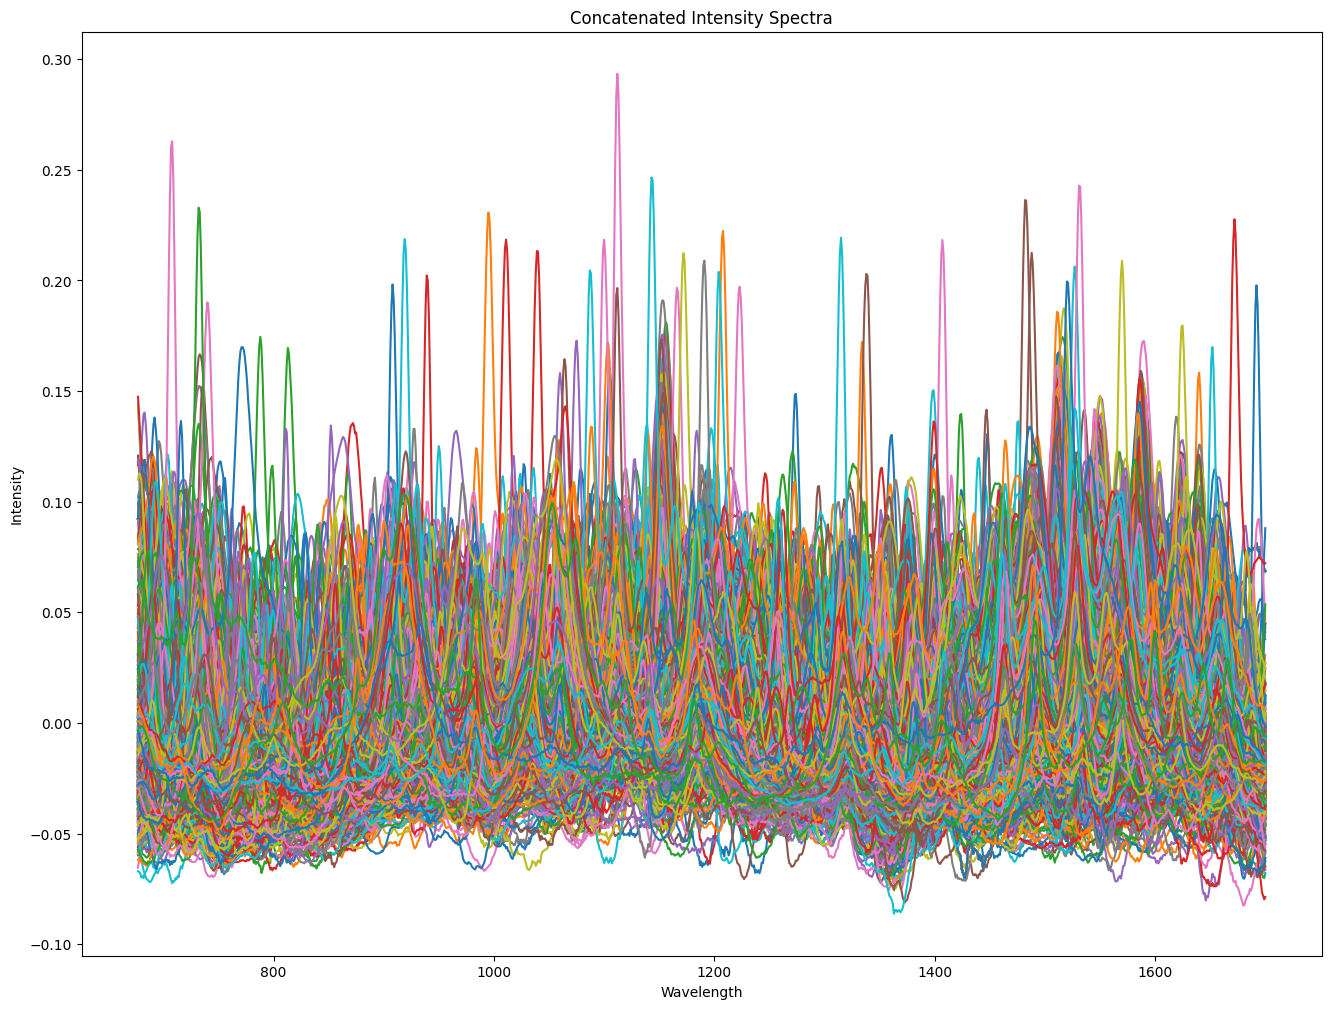

Number of spectra plotted: 1024


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/kaggle/input/allspectra/matched_data_corrected.csv')

# Rename 'SampleName' to 'Spectrum_ID'
data.rename(columns={'SampleName': 'Spectrum_ID'}, inplace=True)

# Parse intensity values from "Spectra" column
data['Spectra'] = data['Spectra'].apply(lambda x: [float(val) for val in x.strip('[]').split(',')])

# Create a list to store concatenated spectra along with Spectrum_ID & Wavelength
concatenated_data = []

# Iterate over each position
for i in range(len(data['Spectra'].iloc[0])):
    # Extract intensity values at position i from all rows
    intensity_values = [row['Spectra'][i] for index, row in data.iterrows()]
    # Append Spectrum_ID, Wavelength & intensity values to list
    concatenated_data.append({
        'Spectrum_ID': data['Spectrum_ID'].values,
        'Wavelength': data['Wavelength'][i],
        'Intensity': intensity_values
    })

# Convert list to DataFrame
concatenated_df = pd.DataFrame(concatenated_data)

# Save
csv_output_path = '/kaggle/working/concatenated_data.csv'
concatenated_df.to_csv(csv_output_path, index=False)

# Plot
plt.figure(figsize=(16, 12))
for index, spectrum in enumerate(concatenated_data):
    plt.plot(data['Wavelength'], spectrum['Intensity'], label=f'Spectrum {index}')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Concatenated Intensity Spectra')
plt.show()

# Print number of spectra plotted
print(f"Number of spectra plotted: {len(data)}")


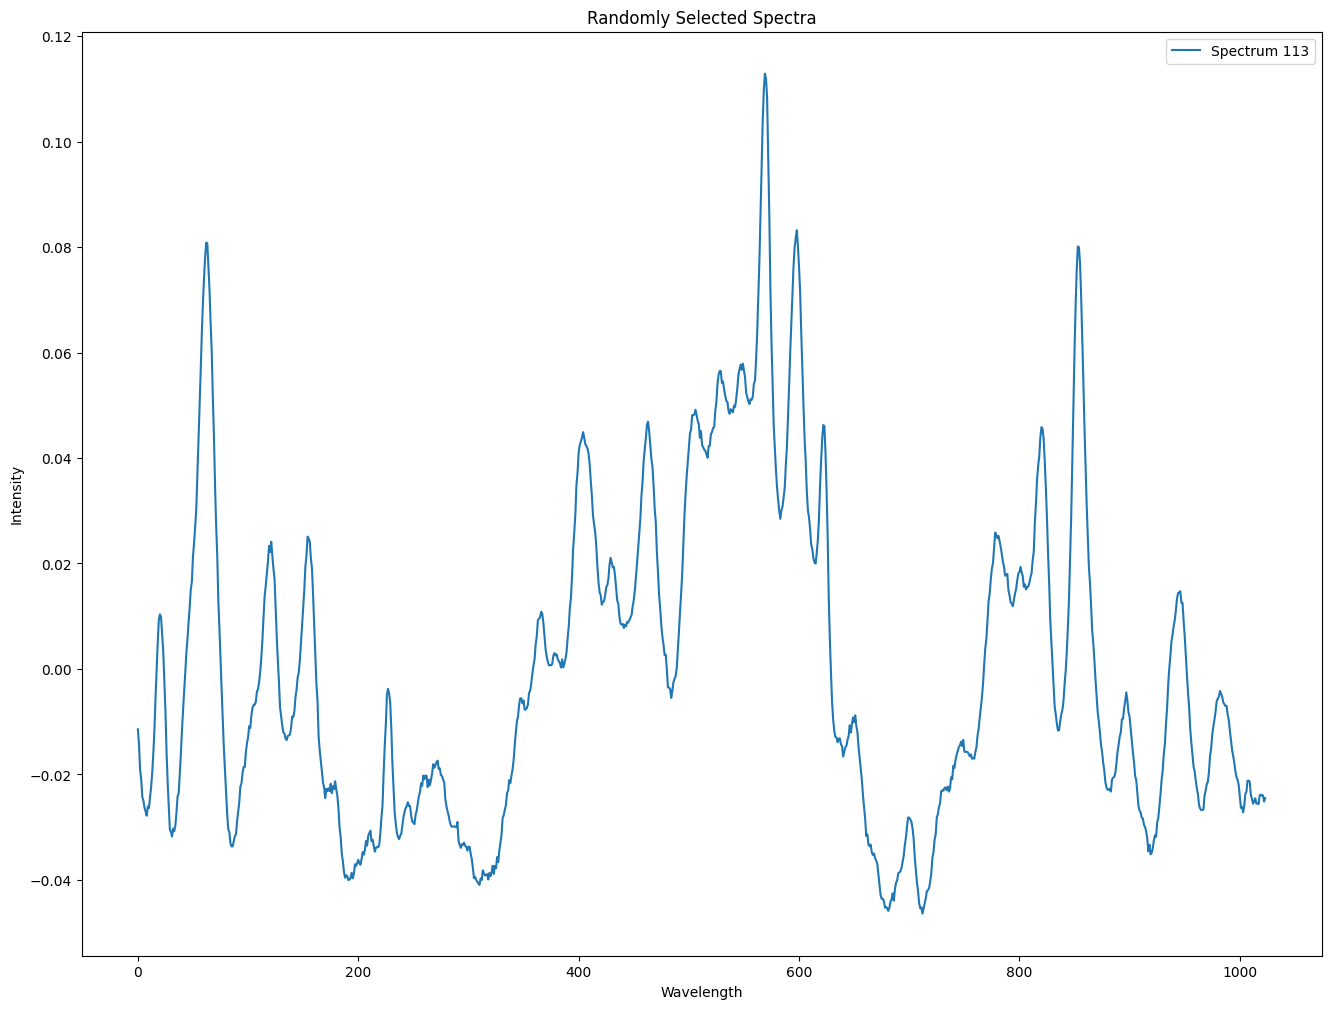

Number of spectra plotted: 1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load data
concatenated_df = pd.read_csv('/kaggle/working/concatenated_data.csv')

# Extract a common set of wavelengths
def get_common_wavelengths(concatenated_df):
    # Assuming the first row contains the wavelength values
    first_spectrum = concatenated_df.iloc[0]['Intensity']
    wavelengths = list(range(len(first_spectrum.strip('[]').split(','))))
    return wavelengths

# Get the common set of wavelengths
common_wavelengths = get_common_wavelengths(concatenated_df)

# Save
concatenated_df.to_csv('/kaggle/working/concatenated_data_random.csv', index=False)

# Plot selected spectra
def plot_random_spectra(concatenated_df, num_spectra=5):
    # Randomly select spectra
    selected_indices = random.sample(range(len(concatenated_df)), num_spectra)
    selected_spectra = concatenated_df.iloc[selected_indices]

    # Plotting
    plt.figure(figsize=(16, 12))
    for index, row in selected_spectra.iterrows():
        # Convert intensity values from string to list of floats
        intensities = [float(i) for i in row['Intensity'].strip('[]').split(',')]
        # Use the common wavelength values
        plt.plot(common_wavelengths, intensities, label=f'Spectrum {index}')
        
    plt.xlabel('Wavelength')
    plt.ylabel('Intensity')
    plt.title('Randomly Selected Spectra')
    plt.legend()
    plt.show()

# Plot 1 randomly selected spectrum
plot_random_spectra(concatenated_df, num_spectra=1)

# Print number of spectra plotted
print(f"Number of spectra plotted: 1")

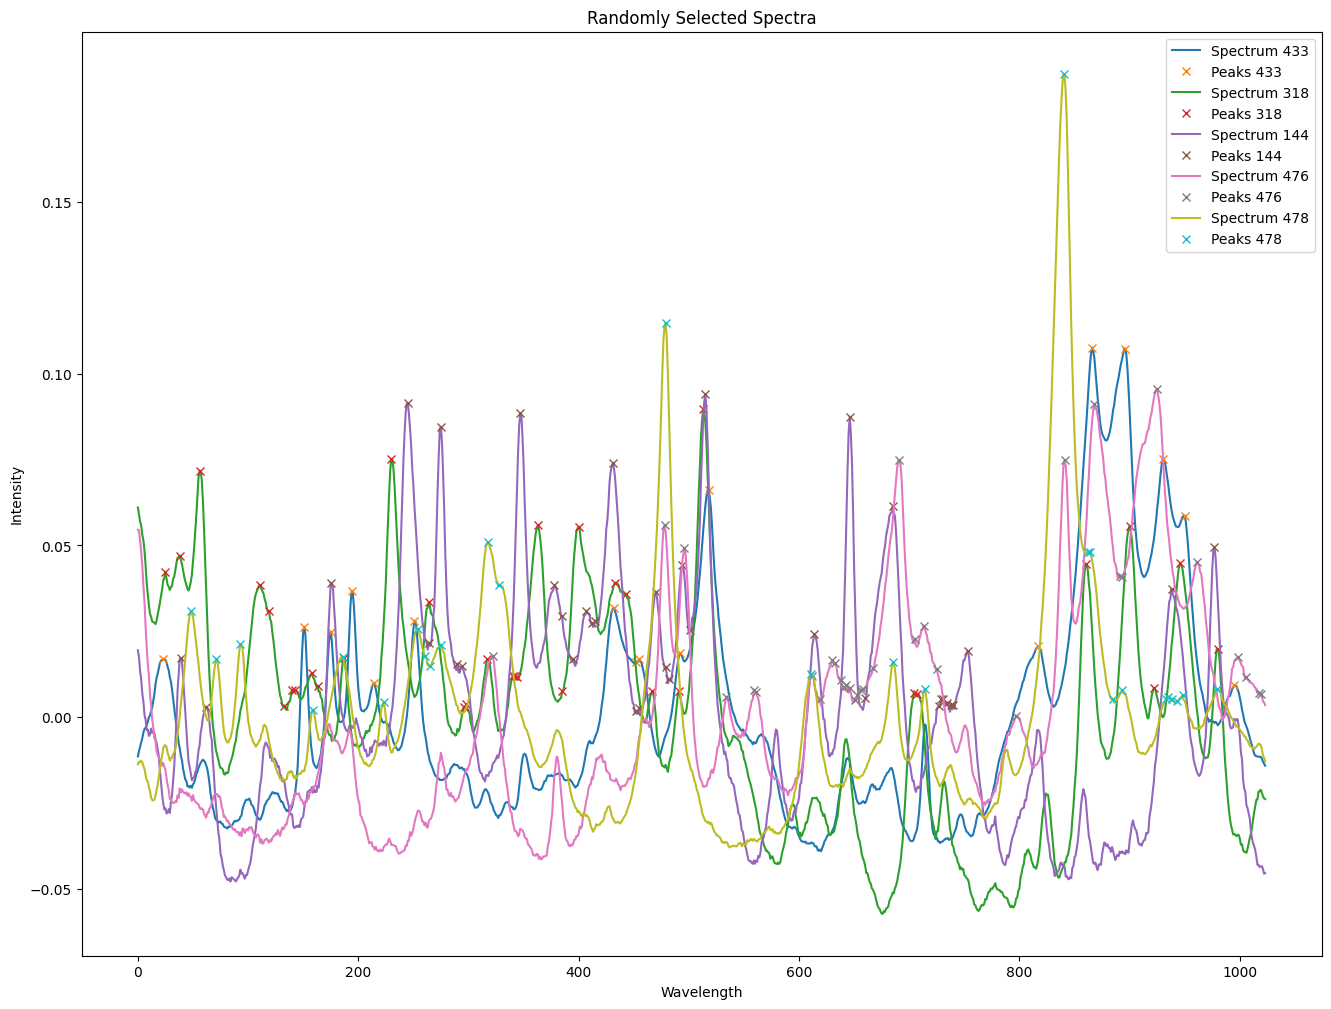

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy as sp
from scipy.signal import find_peaks

# Load data
concatenated_df = pd.read_csv('/kaggle/working/concatenated_data.csv')

# Function to extract a common set of wavelengths
def get_common_wavelengths(concatenated_df):
    # Assuming the first row contains the wavelength values
    first_spectrum = concatenated_df.iloc[0]['Intensity']
    wavelengths = list(range(len(first_spectrum.strip('[]').split(','))))
    return wavelengths

# Get the common set of wavelengths
common_wavelengths = get_common_wavelengths(concatenated_df)

# Save
concatenated_df.to_csv('/kaggle/working/concatenated_data_random.csv', index=False)

# Function to plot selected spectra
def plot_random_spectra(concatenated_df, num_spectra=5):
    # Randomly select spectra
    selected_indices = random.sample(range(len(concatenated_df)), num_spectra)
    selected_spectra = concatenated_df.iloc[selected_indices]

    # Plotting
    plt.figure(figsize=(16, 12))
    for index, row in selected_spectra.iterrows():
        # Convert intensity values from string to list of floats
        intensities = [float(i) for i in row['Intensity'].strip('[]').split(',')]
        # Use the common wavelength values
        plt.plot(common_wavelengths, intensities, label=f'Spectrum {index}')
        # Find peaks
        peaks, _ = find_peaks(intensities, height=0)  # to control peak sensitivity
        plt.plot([common_wavelengths[i] for i in peaks], [intensities[i] for i in peaks], "x", label=f'Peaks {index}')
    
    plt.xlabel('Wavelength')
    plt.ylabel('Intensity')
    plt.title('Randomly Selected Spectra')
    plt.legend()
    plt.show()

# Plot random spectra
plot_random_spectra(concatenated_df, num_spectra=5)


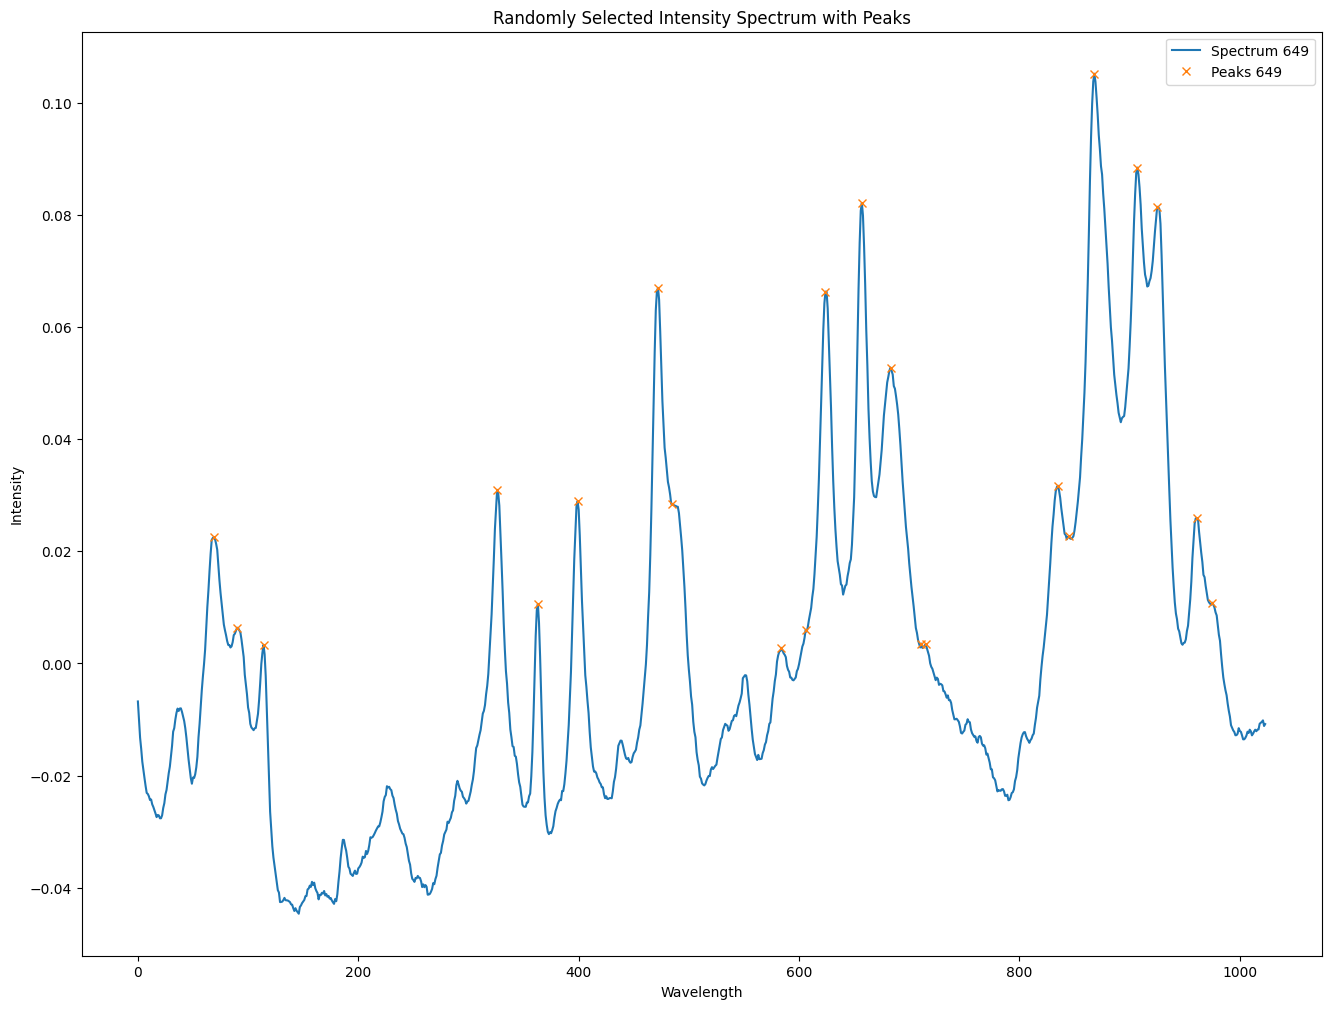

In [4]:
# Directly load
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks

# Load data
data = pd.read_csv('/kaggle/working/concatenated_data_random.csv')

# Cconvert intensity string to list of floats
def convert_intensity_string(intensity_string):
    return [float(i) for i in intensity_string.strip('[]').split(',')]

# Randomly select 1 spectrum
random_index = random.sample(range(len(data)), 1)[0]

# Extract intensity values & convert 
spectrum = convert_intensity_string(data.iloc[random_index]['Intensity'])

# Assuming common wavelengths are same for all spectra
common_wavelengths = list(range(len(spectrum)))

# Plot randomly selected spectrum
plt.figure(figsize=(16, 12))

# Find peaks
peaks, _ = find_peaks(spectrum, height=0) 

# Plot 
plt.plot(common_wavelengths, spectrum, label=f'Spectrum {random_index}')

# Plot peaks
plt.plot([common_wavelengths[i] for i in peaks], [spectrum[i] for i in peaks], "x", label=f'Peaks {random_index}')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Randomly Selected Intensity Spectrum with Peaks')
plt.legend()
plt.show()


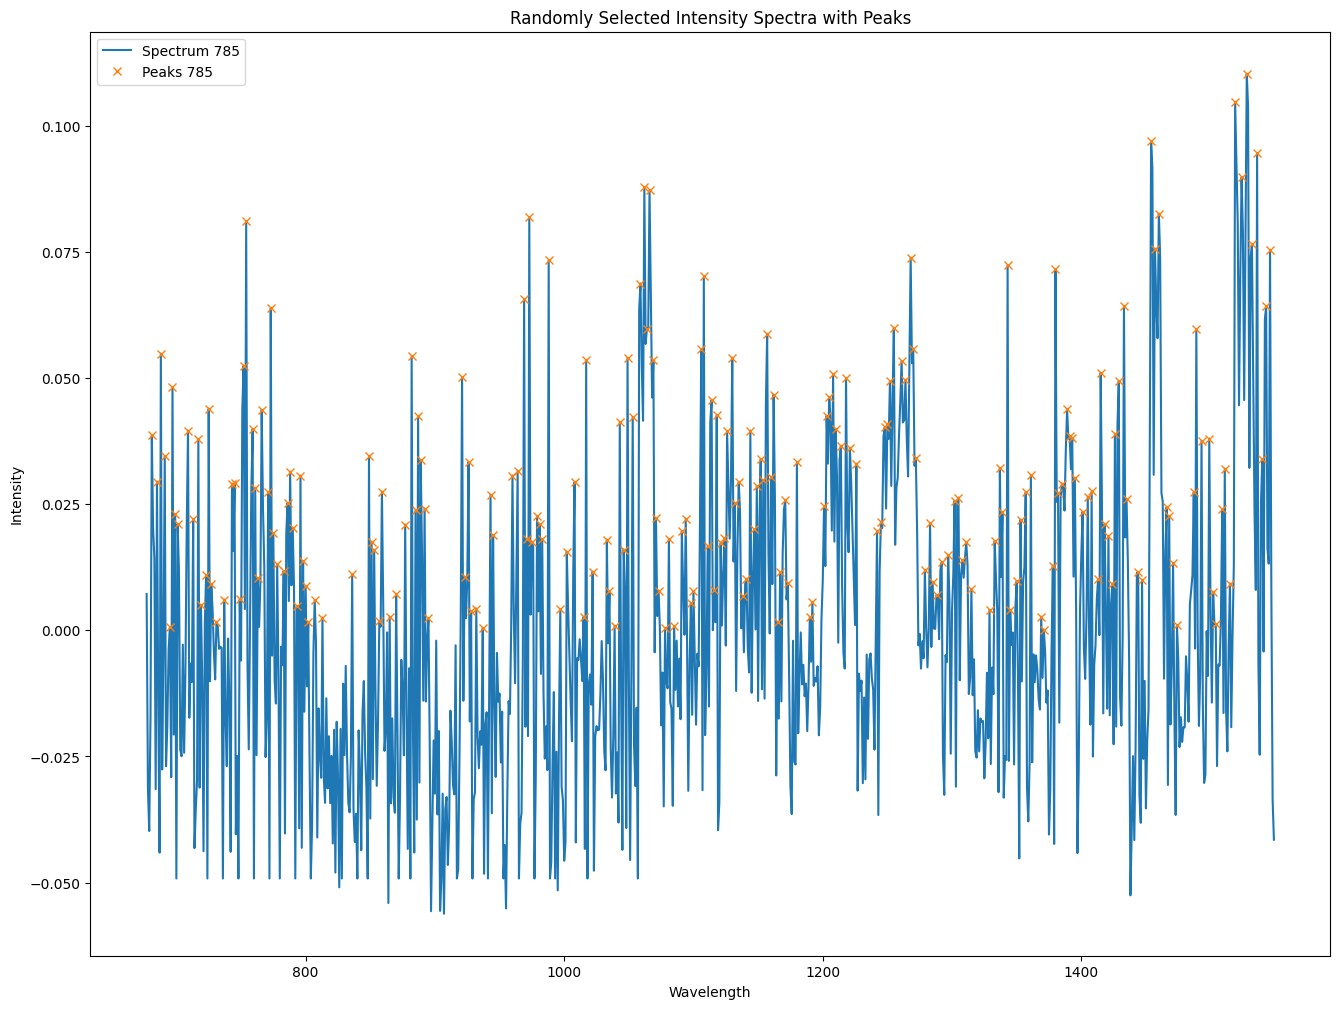

In [5]:
# Load over iterating in general database
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks

# Load data
data = pd.read_csv('/kaggle/working/concatenated_data_random.csv')

# Parse intensity values from the "Intensity" column
data['Intensity'] = data['Intensity'].apply(lambda x: [float(val) for val in x.strip('[]').split(',')])

# Create an empty list to store concatenated spectra
concatenated_spectra = []

# Iterate over each position
for i in range(len(data['Intensity'].iloc[0])):
    # Extract intensity values at position i from all rows
    intensity_values = [row['Intensity'][i] for index, row in data.iterrows()]
    # Append intensity values to concatenated spectra list
    concatenated_spectra.append(intensity_values)

# Randomly select 1 spectrum
random_indices = random.sample(range(len(concatenated_spectra)), 1)

# Plot randomly selected spectra
plt.figure(figsize=(16, 12))
for index in random_indices:
    spectrum = concatenated_spectra[index]
    
    # Find peaks
    peaks, _ = find_peaks(spectrum, height=0)  # to control peak sensitivity
    
    plt.plot(data['Wavelength'], spectrum, label=f'Spectrum {index}')
    plt.plot([data['Wavelength'][i] for i in peaks], [spectrum[i] for i in peaks], "x", label=f'Peaks {index}')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Randomly Selected Intensity Spectra with Peaks')
plt.legend()
plt.show()


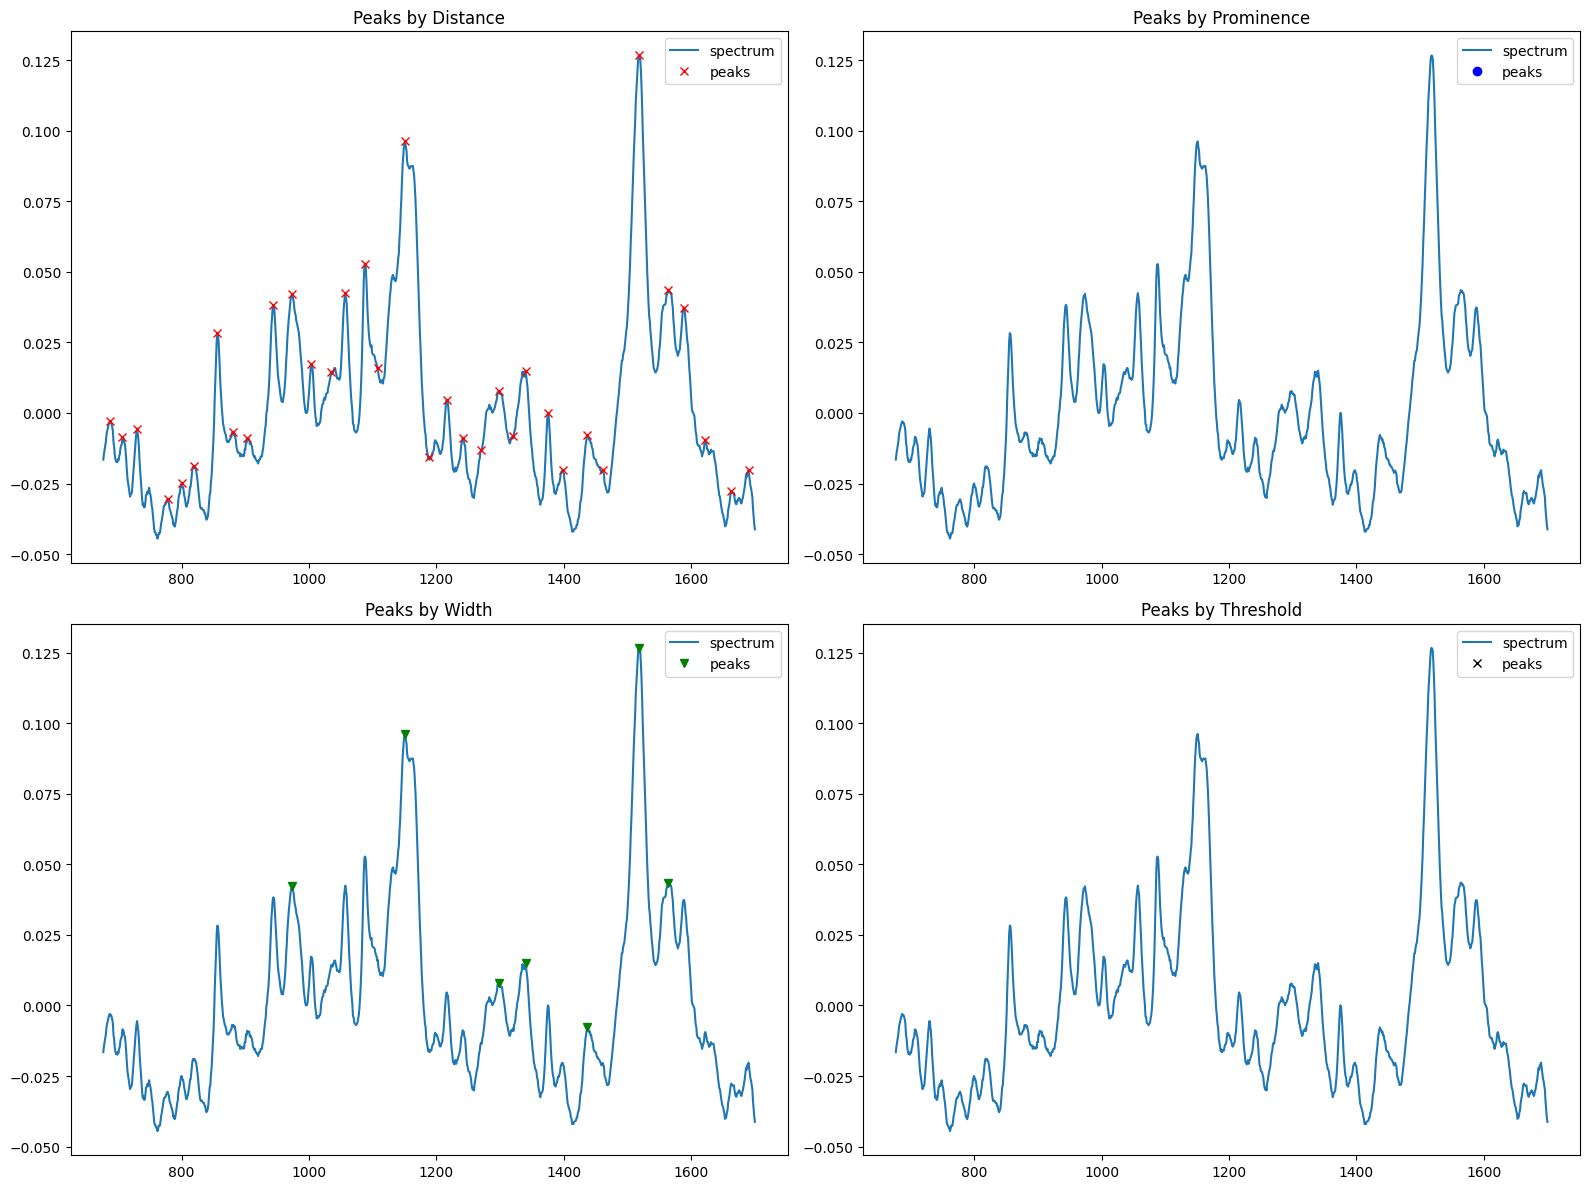

In [6]:
# Original 1st parameters values
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks
import numpy as np

# Load data
data = pd.read_csv('/kaggle/input/allspectra/matched_data_corrected.csv')

# Parse intensity values from column
data['Spectra'] = data['Spectra'].apply(lambda x: [float(val) for val in x.strip('[]').split(',')])

# Create an empty list to store concatenated spectra
concatenated_spectra = []

# Iterate over each position 
for i in range(len(data['Spectra'].iloc[0])):
    # Extract intensity values at position i from all rows
    intensity_values = [row['Spectra'][i] for index, row in data.iterrows()]
    # Append intensity values to concatenated spectra list
    concatenated_spectra.append(intensity_values)

# Randomly select 1 spectrum
random_indices = random.sample(range(len(concatenated_spectra)), 1)

# Save
random_spectra = pd.DataFrame([concatenated_spectra[index] for index in random_indices])
random_spectra.to_csv('/kaggle/working/random_spectra.csv', index=False)

# Plot  
plt.figure(figsize=(16, 12))

for index in random_indices:
    spectrum = concatenated_spectra[index]
    
    # Convert spectrum to numpy array for peak detection
    spectrum_array = np.array(spectrum)
    
    # Find peaks using different methods
    peaks_distance, _ = find_peaks(spectrum_array, distance=20)
    peaks_prominence, _ = find_peaks(spectrum_array, prominence=1)
    peaks_width, _ = find_peaks(spectrum_array, width=20)
    peaks_threshold, _ = find_peaks(spectrum_array, threshold=0.4)
    
    plt.subplot(2, 2, 1)
    plt.plot(data['Wavelength'], spectrum_array)
    plt.plot(data['Wavelength'][peaks_distance], spectrum_array[peaks_distance], "xr")
    plt.title('Peaks by Distance')
    plt.legend(['spectrum', 'peaks'])

    plt.subplot(2, 2, 2)
    plt.plot(data['Wavelength'], spectrum_array)
    plt.plot(data['Wavelength'][peaks_prominence], spectrum_array[peaks_prominence], "ob")
    plt.title('Peaks by Prominence')
    plt.legend(['spectrum', 'peaks'])

    plt.subplot(2, 2, 3)
    plt.plot(data['Wavelength'], spectrum_array)
    plt.plot(data['Wavelength'][peaks_width], spectrum_array[peaks_width], "vg")
    plt.title('Peaks by Width')
    plt.legend(['spectrum', 'peaks'])

    plt.subplot(2, 2, 4)
    plt.plot(data['Wavelength'], spectrum_array)
    plt.plot(data['Wavelength'][peaks_threshold], spectrum_array[peaks_threshold], "xk")
    plt.title('Peaks by Threshold')
    plt.legend(['spectrum', 'peaks'])

plt.tight_layout()
plt.show()


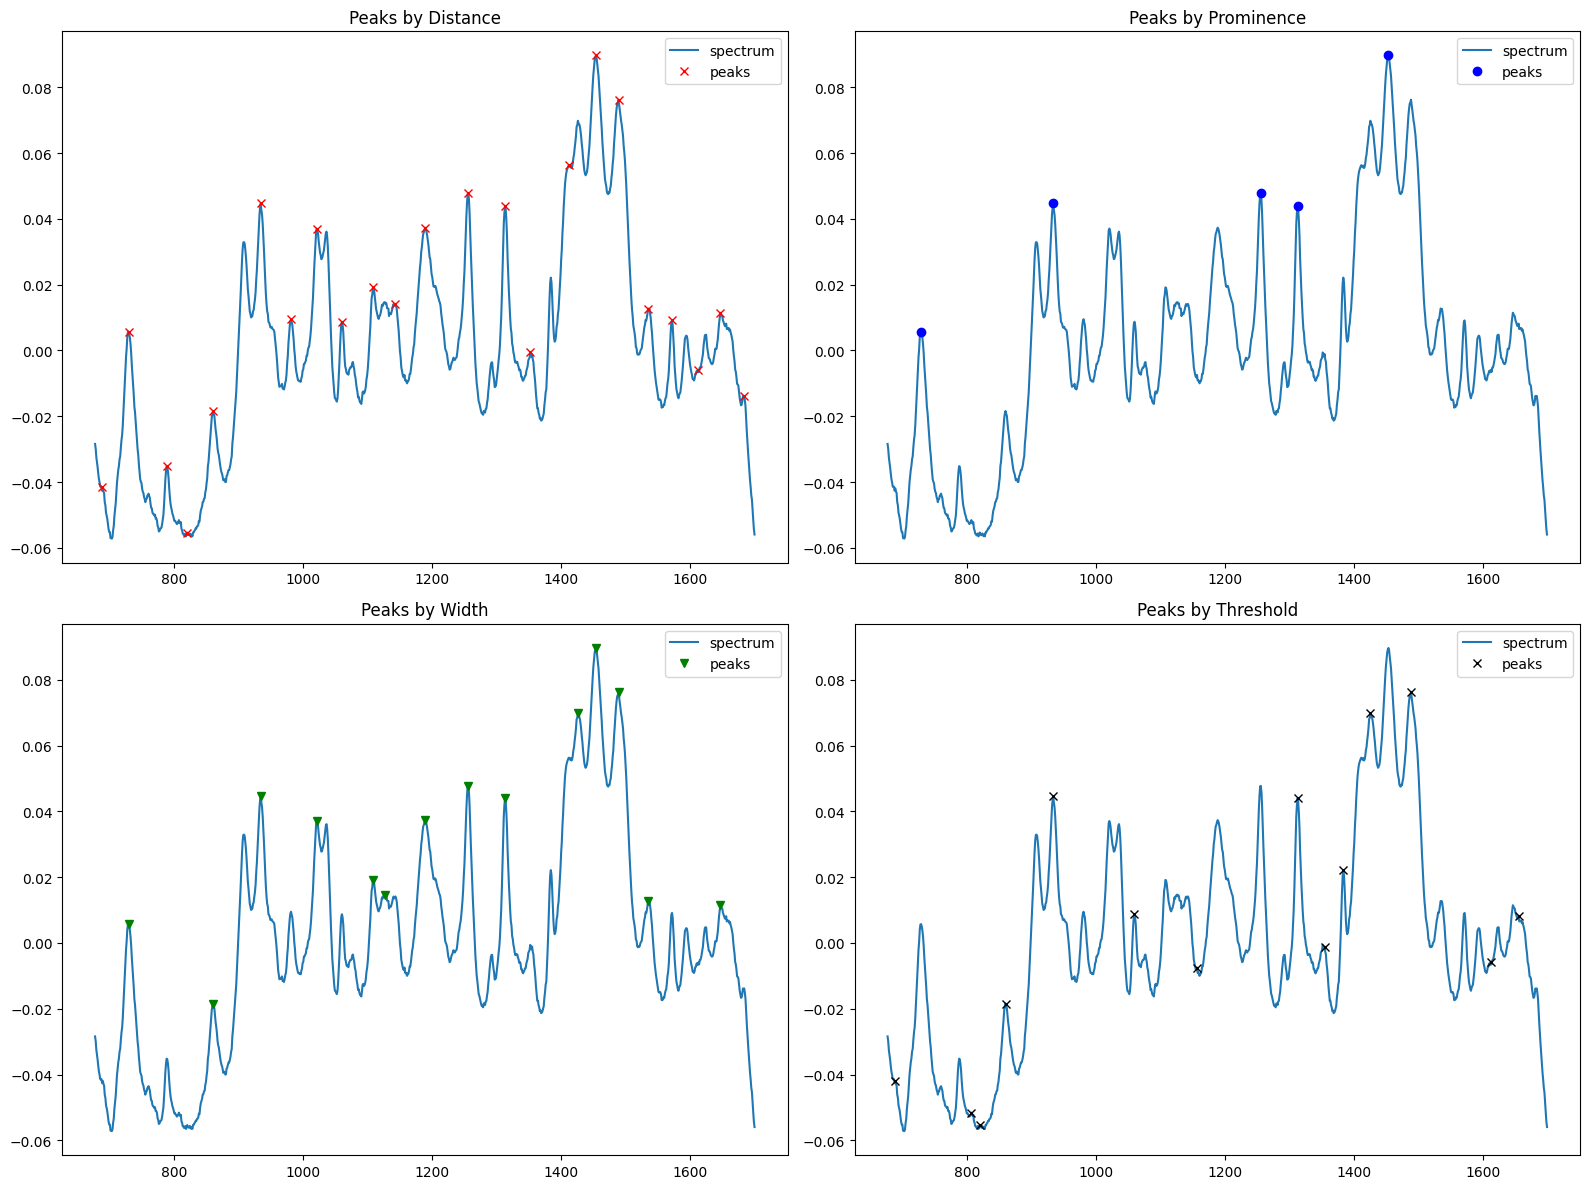

In [7]:
# Modifying values of parameters
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks
import numpy as np

# Load data
data = pd.read_csv('/kaggle/input/allspectra/matched_data_corrected.csv')

# Parse intensity values 
data['Spectra'] = data['Spectra'].apply(lambda x: [float(val) for val in x.strip('[]').split(',')])

# Create an empty list to store concatenated spectra
concatenated_spectra = []

# Iterate over each position
for i in range(len(data['Spectra'].iloc[0])):
    # Extract intensity values at position i from all rows
    intensity_values = [row['Spectra'][i] for index, row in data.iterrows()]
    # Append intensity values to concatenated spectra list
    concatenated_spectra.append(intensity_values)

# Randomly select 1 spectrum
random_indices = random.sample(range(len(concatenated_spectra)), 1)

# Save 
random_spectra = pd.DataFrame([concatenated_spectra[index] for index in random_indices])
random_spectra.to_csv('/kaggle/working/random_spectra.csv', index=False)

# Plot
plt.figure(figsize=(16, 12))

for index in random_indices:
    spectrum = concatenated_spectra[index]
    
    # Convert spectrum to numpy array for peak detection
    spectrum_array = np.array(spectrum)
    
    # Find peaks using different methods (new values)
    peaks_distance, _ = find_peaks(spectrum_array, distance=30)
    peaks_prominence, _ = find_peaks(spectrum_array, prominence=0.05)
    peaks_width, _ = find_peaks(spectrum_array, width=10)
    peaks_threshold, _ = find_peaks(spectrum_array, threshold=0.0006)
    
    # Subplots
    plt.subplot(2, 2, 1)
    plt.plot(data['Wavelength'], spectrum_array)
    plt.plot(data['Wavelength'][peaks_distance], spectrum_array[peaks_distance], "xr")
    plt.title('Peaks by Distance')
    plt.legend(['spectrum', 'peaks'])

    plt.subplot(2, 2, 2)
    plt.plot(data['Wavelength'], spectrum_array)
    plt.plot(data['Wavelength'][peaks_prominence], spectrum_array[peaks_prominence], "ob")
    plt.title('Peaks by Prominence')
    plt.legend(['spectrum', 'peaks'])

    plt.subplot(2, 2, 3)
    plt.plot(data['Wavelength'], spectrum_array)
    plt.plot(data['Wavelength'][peaks_width], spectrum_array[peaks_width], "vg")
    plt.title('Peaks by Width')
    plt.legend(['spectrum', 'peaks'])

    plt.subplot(2, 2, 4)
    plt.plot(data['Wavelength'], spectrum_array)
    plt.plot(data['Wavelength'][peaks_threshold], spectrum_array[peaks_threshold], "xk")
    plt.title('Peaks by Threshold')
    plt.legend(['spectrum', 'peaks'])

plt.tight_layout()
plt.show()


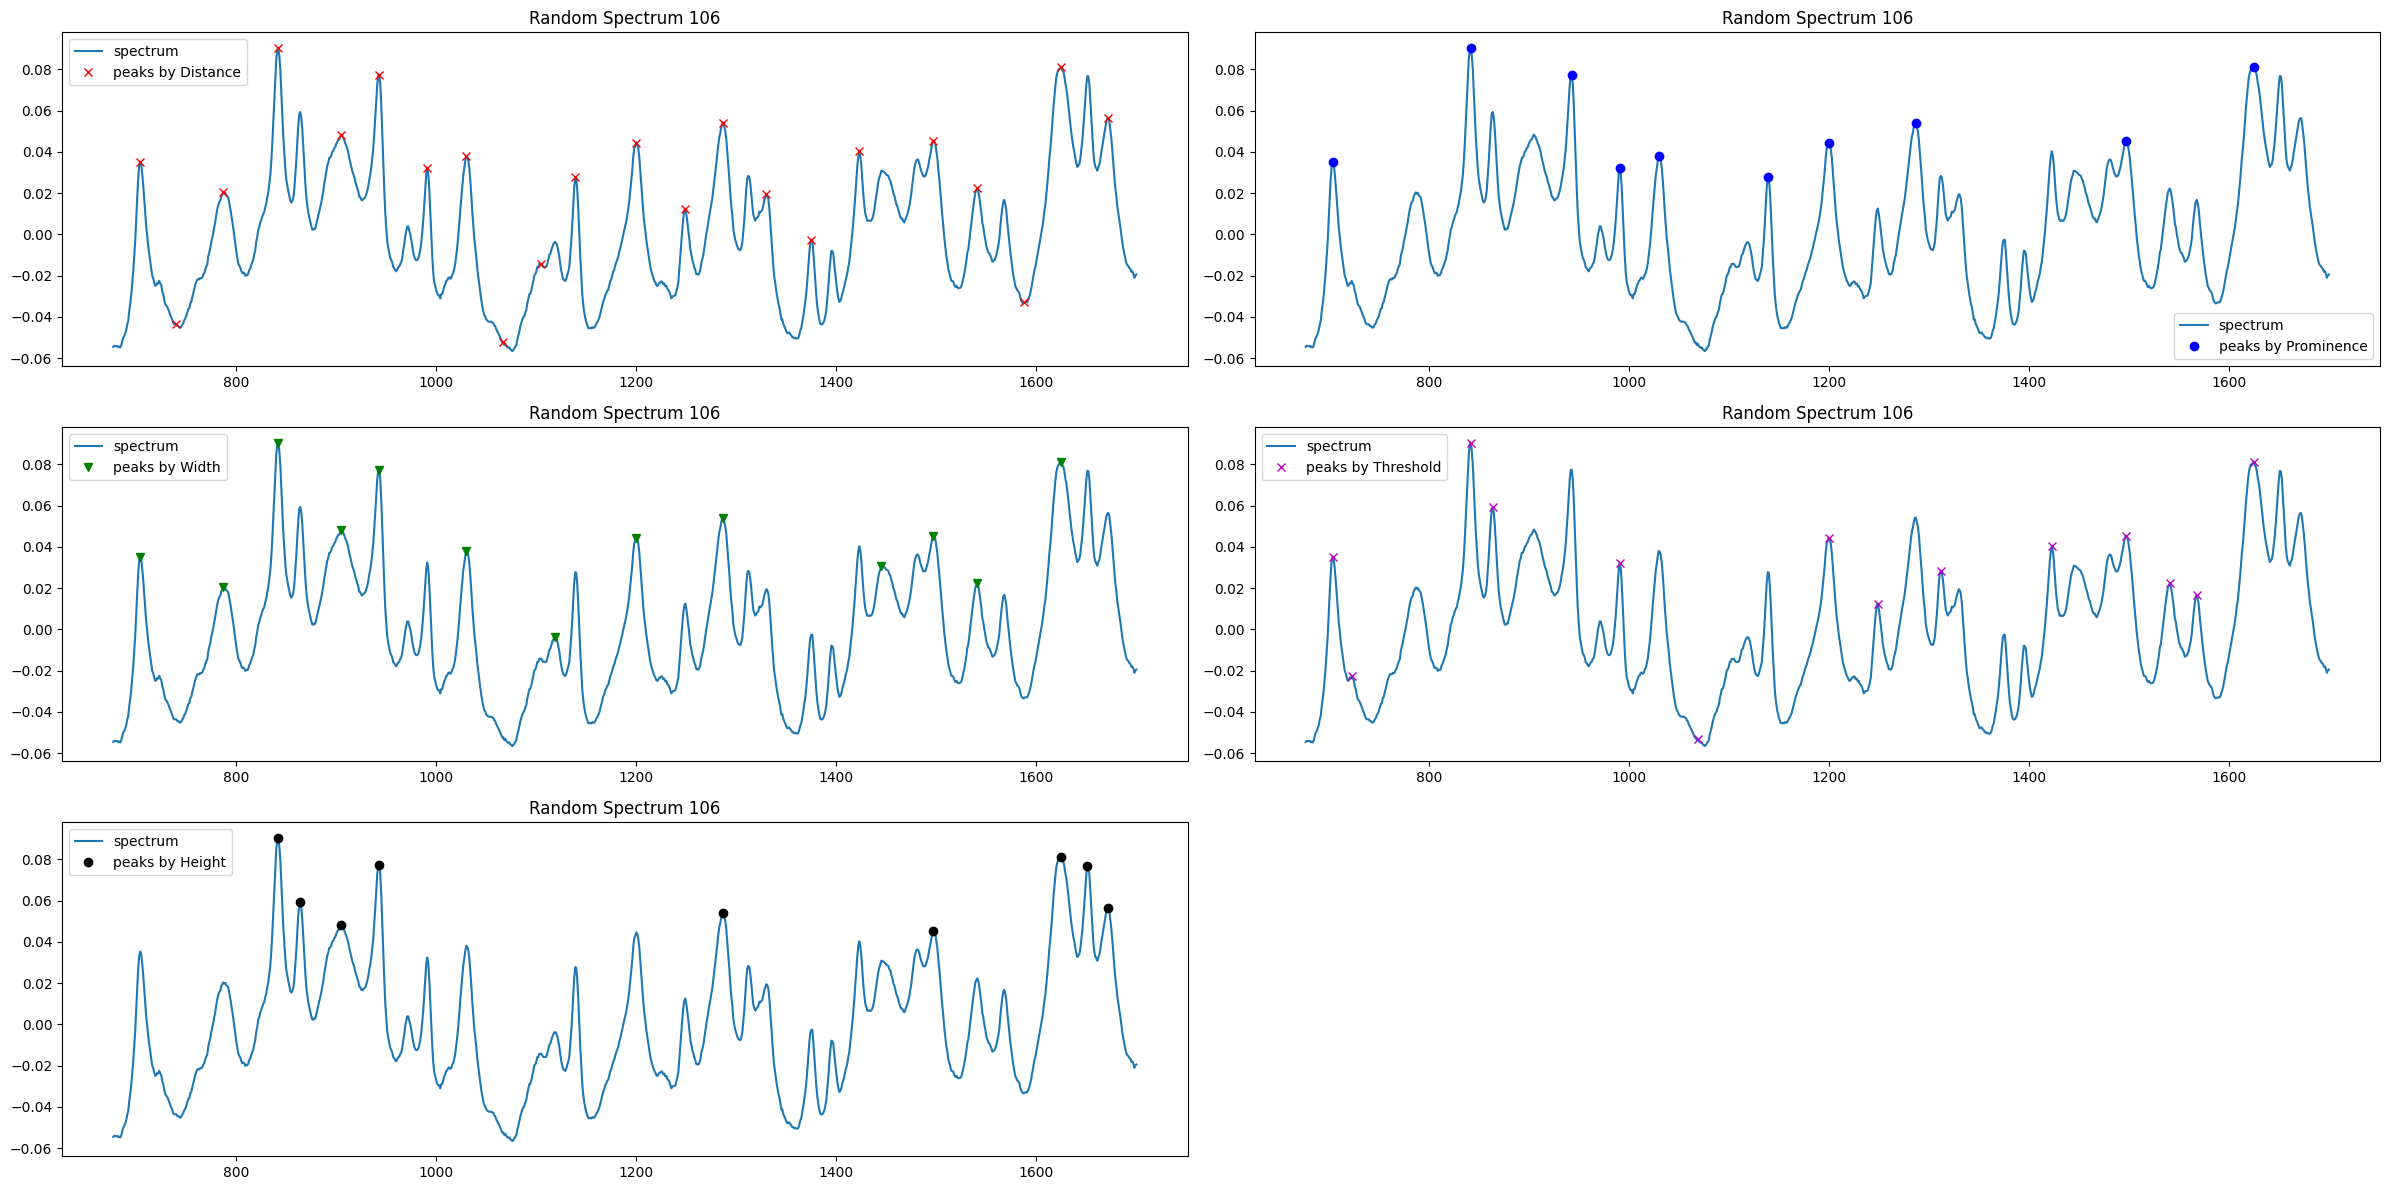

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks
import numpy as np

# Load data
data = pd.read_csv('/kaggle/input/allspectra/matched_data_corrected.csv')

# Parse intensity values 
data['Spectra'] = data['Spectra'].apply(lambda x: [float(val) for val in x.strip('[]').split(',')])

# Create an empty list to store concatenated spectra
concatenated_spectra = []

# Iterate over each position 
for i in range(len(data['Spectra'].iloc[0])):
    # Extract intensity values at position i from all rows
    intensity_values = [row['Spectra'][i] for index, row in data.iterrows()]
    # Append intensity values to concatenated spectra list
    concatenated_spectra.append(intensity_values)

# Randomly select 1 spectrum
random_indices = random.sample(range(len(concatenated_spectra)), 1)

# Plot
plt.figure(figsize=(24, 12))

# Iterate over randomly selected spectra indices
for idx, index in enumerate(random_indices, start=1):
    spectrum = concatenated_spectra[index]
    spectrum_array = np.array(spectrum)
    
    # Find peaks using different methods
    peaks_distance, _ = find_peaks(spectrum_array, distance=30)
    peaks_prominence, _ = find_peaks(spectrum_array, prominence=0.05)
    peaks_width, _ = find_peaks(spectrum_array, width=10)
    peaks_threshold, _ = find_peaks(spectrum_array, threshold=0.0006)
    
    
    # Adjusted height parameter based on data range
    adjusted_height = np.max(spectrum_array) * 0.5
    peaks_height, _ = find_peaks(spectrum_array, height=adjusted_height)
          
    # Plot by method 
    plt.subplot(3, 2, 1)
    
    plt.plot(data['Wavelength'], spectrum_array, label='spectrum')
    if peaks_distance.any():
        plt.plot(data['Wavelength'].iloc[peaks_distance], spectrum_array[peaks_distance], "xr", label='peaks by Distance')
    plt.title(f'Random Spectrum {index}')
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.plot(data['Wavelength'], spectrum_array, label='spectrum')
    if peaks_prominence.any():
        plt.plot(data['Wavelength'].iloc[peaks_prominence], spectrum_array[peaks_prominence], "ob", label='peaks by Prominence')
    plt.title(f'Random Spectrum {index}')
    plt.legend()

    plt.subplot(3, 2, 3)
    plt.plot(data['Wavelength'], spectrum_array, label='spectrum')
    if peaks_width.any():
        plt.plot(data['Wavelength'].iloc[peaks_width], spectrum_array[peaks_width], "vg", label='peaks by Width')
    plt.title(f'Random Spectrum {index}')
    plt.legend()

    plt.subplot(3, 2, 4)
    plt.plot(data['Wavelength'], spectrum_array, label='spectrum')
    if peaks_threshold.any():
        plt.plot(data['Wavelength'].iloc[peaks_threshold], spectrum_array[peaks_threshold], "xm", label='peaks by Threshold')
    plt.title(f'Random Spectrum {index}')
    plt.legend()

    plt.subplot(3, 2, 5)
    plt.plot(data['Wavelength'], spectrum_array, label='spectrum')
    if peaks_height.size > 0:
        plt.plot(data['Wavelength'].iloc[peaks_height], spectrum_array[peaks_height], "ok", label='peaks by Height')
    plt.title(f'Random Spectrum {index}')
    plt.legend()

plt.tight_layout()
plt.show()

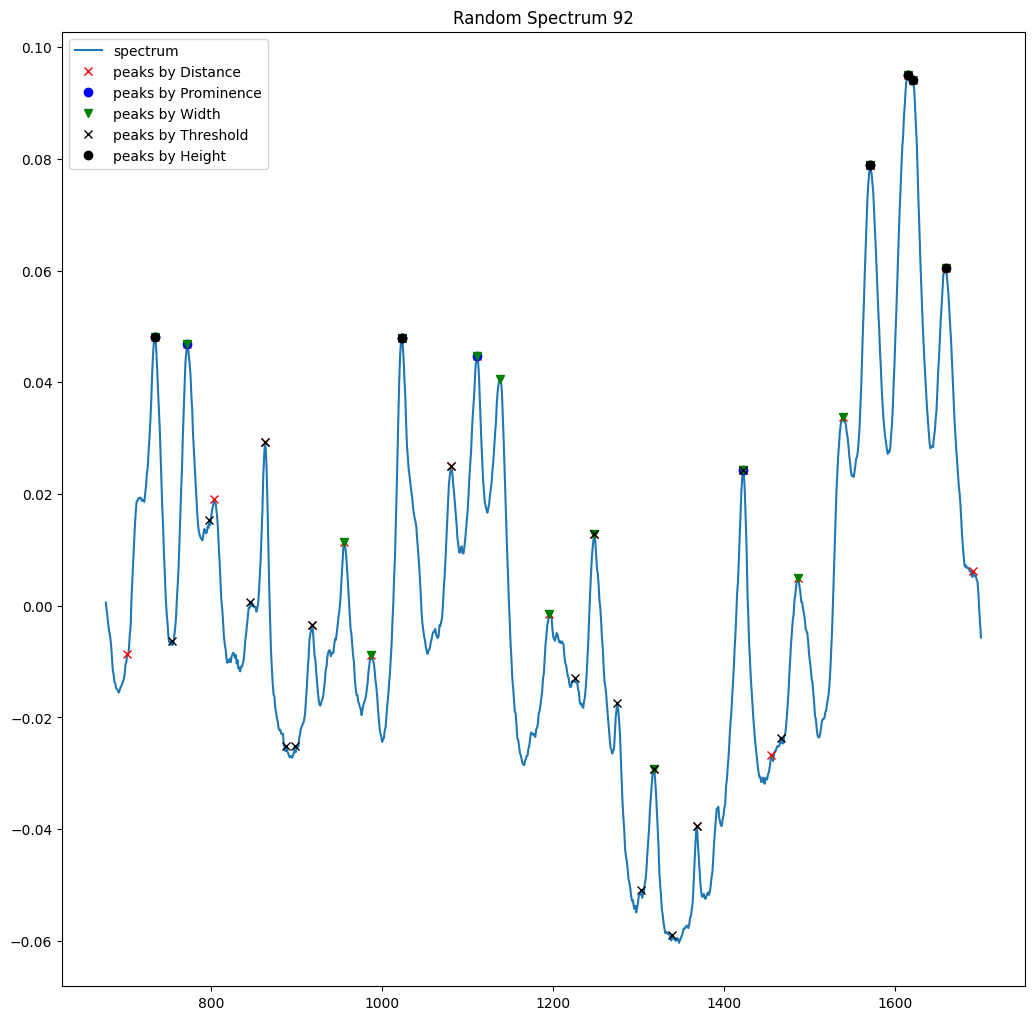

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks
import numpy as np

# Load data
data = pd.read_csv('/kaggle/input/allspectra/matched_data_corrected.csv')

# Parse intensity values 
data['Spectra'] = data['Spectra'].apply(lambda x: [float(val) for val in x.strip('[]').split(',')])

# Create an empty list to store concatenated spectra
concatenated_spectra = []

# Iterate over each position 
for i in range(len(data['Spectra'].iloc[0])):
    # Extract intensity values at position i from all rows
    intensity_values = [row['Spectra'][i] for index, row in data.iterrows()]
    # Append intensity values to concatenated spectra list
    concatenated_spectra.append(intensity_values)

# Randomly select 1 spectrum
random_indices = random.sample(range(len(concatenated_spectra)), 1)

# Plot 
plt.figure(figsize=(30, 20))  
# Iterate over randomly selected spectra indices
for idx, index in enumerate(random_indices, start=1):
    spectrum = concatenated_spectra[index]
    spectrum_array = np.array(spectrum)
    
    # Find peaks using different methods
    peaks_distance, _ = find_peaks(spectrum_array, distance=30)
    peaks_prominence, _ = find_peaks(spectrum_array, prominence=0.05)
    peaks_width, _ = find_peaks(spectrum_array, width=10)
    peaks_threshold, _ = find_peaks(spectrum_array, threshold=0.0006)
    
    # Adjusted height parameter based on data range
    adjusted_height = np.max(spectrum_array) * 0.5
    peaks_height, _ = find_peaks(spectrum_array, height=adjusted_height)
    
    # Combine peaks from different methods
    combined_peaks = np.unique(np.concatenate((peaks_distance, peaks_prominence, peaks_width, peaks_threshold, peaks_height)))
    
    # Plot separate subplot
    plt.subplot(2, 3, idx)  # subplot arrangement for 2 rows and 3 columns
    plt.plot(data['Wavelength'], spectrum_array, label='spectrum')
    
    if peaks_distance.any():
        plt.plot(data['Wavelength'].iloc[peaks_distance], spectrum_array[peaks_distance], "xr", label='peaks by Distance')
    if peaks_prominence.any():
        plt.plot(data['Wavelength'].iloc[peaks_prominence], spectrum_array[peaks_prominence], "ob", label='peaks by Prominence')
    if peaks_width.any():
        plt.plot(data['Wavelength'].iloc[peaks_width], spectrum_array[peaks_width], "vg", label='peaks by Width')
    if peaks_threshold.any():
        plt.plot(data['Wavelength'].iloc[peaks_threshold], spectrum_array[peaks_threshold], "xk", label='peaks by Threshold')
    if peaks_height.any():
        plt.plot(data['Wavelength'].iloc[peaks_height], spectrum_array[peaks_height], "ok", label='peaks by Height')
   
    plt.title(f'Random Spectrum {index}')
    plt.legend()

plt.tight_layout()
plt.show()